In [5]:
import numpy as np
import matplotlib.pyplot as plt
import copy, math
import pandas as pd

## Logistic Regression

In [2]:
data = np.loadtxt("data/ex2data1.txt", delimiter=',')
X_train = data[:,:2]
y_train = data[:,2]

In [3]:
print("First 5 element of X_train: ", X_train[:5])

First 5 element of X_train:  [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]


In [4]:
print("First 5 element of y_train: ", y_train[:5])

First 5 element of y_train:  [0. 0. 0. 1. 1.]


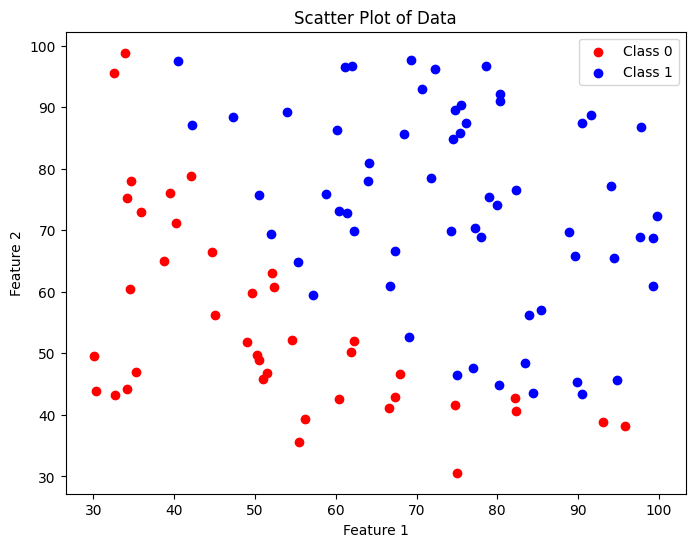

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 1')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Scatter Plot of Data")
plt.show()

In [12]:
def sigmoid(z):
    g = 1 / ( 1 + np.exp(-z))
    return g

In [13]:
sigmoid(0)

0.5

In [18]:
def compute_cost(X, y, w, b, *argv):
    m, n = X.shape
    cost = 0

    for i in range(m):
        z_i = np.dot(X[i], w) + b
        g_i = sigmoid(z_i)
        cost += -y[i] * np.log(g_i) - (1 - y[i]) * np.log(1 - g_i)

    cost /= m

    return cost

In [19]:
m, n = X_train.shape

initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 0.693


In [41]:
def compute_gradient(X, y, w, b, *argv):
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        err_i = sigmoid(np.dot(X[i], w) + b) - y[i]
        dj_dw += err_i * X[i]
        dj_db += err_i
        
    dj_dw /= m
    dj_db /= m

    return dj_db, dj_dw

In [42]:
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

dj_db at initial w and b (zeros):-0.1
dj_dw at initial w and b (zeros):[-12.00921658929115, -11.262842205513591]


In [48]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, lambda_):

    j_history = []
    w_history = []

    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient(X, y, w_in, b_in)

        w_in -= alpha * dj_dw
        b_in -= alpha * dj_db

        if i < 100000:
            cost = compute_cost(X, y, w_in, b_in, lambda_)
            j_history.append(cost)

        if i % math.ceil(num_iters/10) == 0 or i == (num_iters - 1):
            w_history.append(w_in)
            print(f'Iteration {i:4}: Cost {float(j_history[-1]):8.2f}')

    return w_in, b_in, j_history, w_history

In [49]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, alpha, iterations, 0)

Iteration    0: Cost     0.96
Iteration 1000: Cost     0.31
Iteration 2000: Cost     0.30
Iteration 3000: Cost     0.30
Iteration 4000: Cost     0.30
Iteration 5000: Cost     0.30
Iteration 6000: Cost     0.30
Iteration 7000: Cost     0.30
Iteration 8000: Cost     0.30
Iteration 9000: Cost     0.30
Iteration 9999: Cost     0.30


In [50]:
def predict(X, w, b): 

    m, n = X.shape   
    p = np.zeros(m)

    for i in range(m):   
        f_wb = sigmoid(np.dot(X[i],w) + b)
        
        if f_wb > 0.5:
            p[i] = 1
        else:
            p[i] = 0
            
    return p

In [52]:
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

Output of predict: shape (4,), value [0. 1. 1. 1.]


## Regularized Logistic Regression

In [53]:
data = np.loadtxt("data/ex2data2.txt", delimiter=',')
X_train = data[:,:2]
y_train = data[:,2]

In [54]:
print("First 5 element of X: ", X_train[:5])

First 5 element of X:  [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]


In [55]:
print("First 5 element of Y: ", y_train[:5])

First 5 element of Y:  [1. 1. 1. 1. 1.]


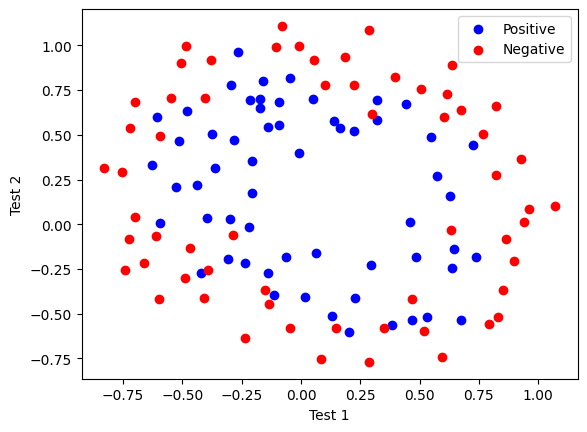

In [65]:
plt.scatter(X_train[y_train == 1][:,0], X_train[y_train == 1][:,1], c='b', label='Positive')
plt.scatter(X_train[y_train == 0][:,0], X_train[y_train == 0][:,1], c='r', label='Negative')
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.legend();

In [66]:
def map_feature(X1, X2):
    """
    Feature mapping function to polynomial features    
    """
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 6
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)

In [67]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


In [68]:
print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", mapped_X[0])

X_train[0]: [0.051267 0.69956 ]
mapped X_train[0]: [5.12670000e-02 6.99560000e-01 2.62830529e-03 3.58643425e-02
 4.89384194e-01 1.34745327e-04 1.83865725e-03 2.50892595e-02
 3.42353606e-01 6.90798869e-06 9.42624411e-05 1.28625106e-03
 1.75514423e-02 2.39496889e-01 3.54151856e-07 4.83255257e-06
 6.59422333e-05 8.99809795e-04 1.22782870e-02 1.67542444e-01
 1.81563032e-08 2.47750473e-07 3.38066048e-06 4.61305487e-05
 6.29470940e-04 8.58939846e-03 1.17205992e-01]


In [78]:
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    m,n = X.shape

    cost_without_reg = compute_cost(X, y, w, b)
    reg_cost = 0.
    
    for i in range(n):
        reg_cost += w[i] ** 2
    reg_cost = (lambda_ / (2*m)) * reg_cost

    total_cost = reg_cost + cost_without_reg

    return total_cost

In [79]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)

Regularized cost : 0.6618252552483948


In [80]:
def compute_gradient_reg(X, y, w, b, lambda_ = 1):
    m, n = X.shape
    dj_db, dj_dw = compute_gradient(X, y, w, b)

    for j in range(n):
        dj_dw[j] += (lambda_/m) * w[j]

    return dj_db, dj_dw

In [81]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )

dj_db: 0.07138288792343662
First few elements of regularized dj_dw:
 [-0.010386028450548701, 0.011409852883280122, 0.0536273463274574, 0.0031402782673134655]


In [82]:
def gradient_descent_reg(X, y, w_in, b_in, alpha, num_iters, lambda_):

    j_history = []
    w_history = []

    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_reg(X, y, w_in, b_in)

        w_in -= alpha * dj_dw
        b_in -= alpha * dj_db

        if i < 100000:
            cost = compute_cost_reg(X, y, w_in, b_in, lambda_)
            j_history.append(cost)

        if i % math.ceil(num_iters/10) == 0 or i == (num_iters - 1):
            w_history.append(w_in)
            print(f'Iteration {i:4}: Cost {float(j_history[-1]):8.2f}')

    return w_in, b_in, j_history, w_history

In [83]:
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.
lambda_ = 0.01    
iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b, alpha, iterations, lambda_)

Iteration    0: Cost     0.72
Iteration 1000: Cost     0.59
Iteration 2000: Cost     0.56
Iteration 3000: Cost     0.53
Iteration 4000: Cost     0.51
Iteration 5000: Cost     0.50
Iteration 6000: Cost     0.48
Iteration 7000: Cost     0.47
Iteration 8000: Cost     0.46
Iteration 9000: Cost     0.45
Iteration 9999: Cost     0.44


In [84]:
p = predict(X_mapped, w, b)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 82.203390
